# Hypothesis

- People are more likely to shop online after working hours.
- People are more likely to shop during weekends.
- People are more likely to shop in certain months of the year (i.e. Christmas season), each individual countries’ end of year sales, etc.
- Low unit value items are more likely to be a top 5 sales item in each country.


In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Filepath of the CSV files
csv_path_1 ='Resources/Year 2009-2010.csv'
csv_path_2 ='Resources/Year 2010-2011.csv'

# Read through CSV files via Pandas
df1=pd.read_csv(csv_path_1, encoding="ISO-8859-1")
df2=pd.read_csv(csv_path_2, encoding="ISO-8859-1")

# Merge the files
dataset = df1.append([df2])

# Display dataframe
dataset.head()

,ï»¿Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom


In [3]:
# Check out the dataframe using describe and info
dataset.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ï»¿Invoice   1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.3+ MB


In [5]:
dataset.keys()

Index(['ï»¿Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [6]:
dataset.count()

ï»¿Invoice     1067371
StockCode      1067371
Description    1062989
Quantity       1067371
InvoiceDate    1067371
Price          1067371
Customer ID     824364
Country        1067371
dtype: int64

Number of customer IDs being less than invoices means that some people did not register and checked out as a guest.

In [7]:
dataset.keys()

Index(['ï»¿Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [8]:
dataset['ï»¿Invoice'] = dataset['ï»¿Invoice'].astype(str)
dataset['StockCode'] = dataset['StockCode'].astype(str)
dataset['Description'] = dataset['Description'].astype(str)
dataset['InvoiceDate'] = dataset['InvoiceDate'].astype(str)
dataset['Country'] = dataset['Country'].astype(str)

In [9]:
dataset=dataset.rename(columns= {"ï»¿Invoice":"Invoice Number",
                         "StockCode": "Stock Code",
                         "InvoiceDate": "Invoice Date",
                         })

In [10]:
grouped_data= dataset.groupby("Country")
grouped_data.count()

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID
Country,,,,,,,
Australia,1913,1913,1913,1913,1913,1913,1913
Austria,938,938,938,938,938,938,938
Bahrain,126,126,126,126,126,126,59
Belgium,3123,3123,3123,3123,3123,3123,3123
Bermuda,34,34,34,34,34,34,0
Brazil,94,94,94,94,94,94,94
Canada,228,228,228,228,228,228,228
Channel Islands,1664,1664,1664,1664,1664,1664,1664
Cyprus,1176,1176,1176,1176,1176,1176,1176


In [11]:
dataset

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/11 12:50,4.95,12680.0,France


In [41]:
#This is to split the date and time out as separate date and time
dataset['Dates'] = pd.to_datetime(dataset['Invoice Date']).dt.date
dataset['Time'] = pd.to_datetime(dataset['Invoice Date']).dt.time

In [42]:
#This is to convert the dates to datetime format and then converting the date to day of the week
dataset['Dates'] = pd.to_datetime(dataset['Dates'])
dataset['day_of_week'] = dataset['Dates'].dt.day_name()
dataset

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country,Dates,Time,day_of_week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom,2009-01-12,07:45:00,Monday
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,07:45:00,Monday
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,07:45:00,Monday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom,2009-01-12,07:45:00,Monday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom,2009-01-12,07:45:00,Monday
...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.0,France,2011-09-12,12:50:00,Monday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12:50:00,Monday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12:50:00,Monday
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/11 12:50,4.95,12680.0,France,2011-09-12,12:50:00,Monday


In [49]:
cleaned_countries_dataset = dataset.loc[dataset['Country'] != 'Unspecified']
cleaned_countries_dataset

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country,Dates,Time,day_of_week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom,2009-01-12,07:45:00,Monday
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,07:45:00,Monday
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,07:45:00,Monday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom,2009-01-12,07:45:00,Monday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom,2009-01-12,07:45:00,Monday
...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.0,France,2011-09-12,12:50:00,Monday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12:50:00,Monday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12:50:00,Monday
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/11 12:50,4.95,12680.0,France,2011-09-12,12:50:00,Monday


### Number of orders per day

Here we are analysing overall the number of items being purchased each day. 
As it be seen, Wednesday has the lowest sales out of any other days. 
On Tuesdays and Thursdays, it has the highest number of orders. Although Saturday and Sundays are not far behind of being the highest orders as well.

Text(0, 0.5, 'Number of orders')

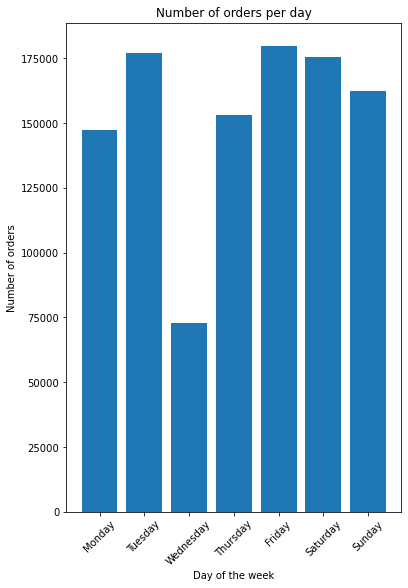

In [122]:
#Group data by day of the week
grouped_day_of_the_week = dataset.groupby(['day_of_week'])
bar_plot_data= grouped_day_of_the_week.count()

#Create a list of the day of the week
x_axis = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


#Plot the graph
plt.figure(figsize=(6,9))
plt.bar(x_axis,bar_plot_data['Invoice Number'], align='center')
plt.title('Number of orders per day')
plt.xlabel('Day of the week')
plt.xticks(rotation=45)
plt.ylabel('Number of orders')


### Number of unique orders each day

In this section we are analysing the number of unique orders for each day. Similar to the overall number of order analysis, Wednesdays have the lowest number of order. On the other hand, the highest level of unique orders happens on a Friday.



Text(0, 0.5, 'Number of unique orders')

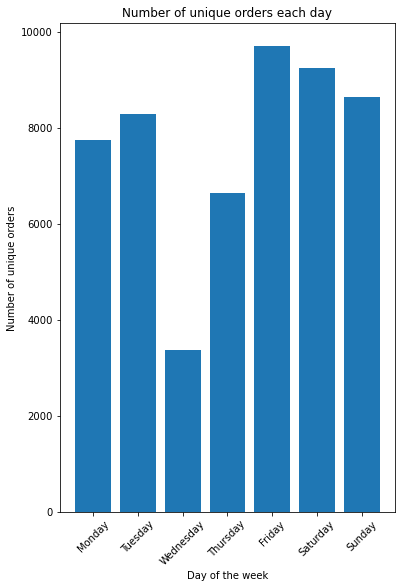

In [123]:
#Group data by day of the week
grouped_day_of_the_week = dataset.groupby(['day_of_week'])
bar_plot_data= grouped_day_of_the_week['Invoice Number'].nunique()

#Create a list of the day of the week
x_axis = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


#Plot the graph
plt.figure(figsize=(6,9))
plt.bar(x_axis,bar_plot_data, align='center')
plt.title('Number of unique orders each day')
plt.xlabel('Day of the week')
plt.xticks(rotation=45)
plt.ylabel('Number of unique orders')

### Average unit price of order per day

In this section, analysis on the average unit price of items is conducted. This analysis looks at whether a certain day of the week has the highest unit price sales.

As it can be seen on Thursdays it seems that the average unit price of purchase is the lowest while on Tuesdays the average unit price is the highest. 

Text(0, 0.5, 'Average Price')

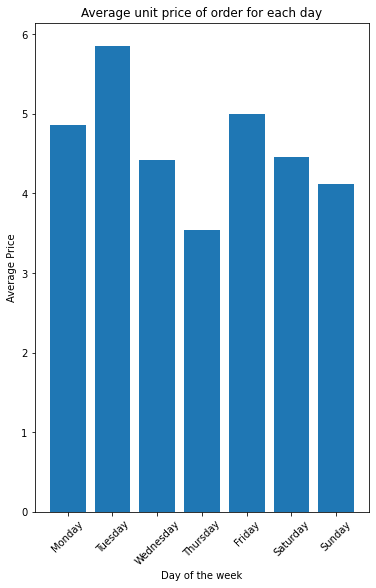

In [124]:
#Group data by day of the week
grouped_day_of_the_week = dataset.groupby(['day_of_week'])
bar_plot_data= grouped_day_of_the_week.mean()

#Create a list of the day of the week
x_axis = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


#Plot the graph
plt.figure(figsize=(6,9))
plt.bar(x_axis,bar_plot_data['Price'], align='center')
plt.title('Average unit price of order for each day')
plt.xlabel('Day of the week')
plt.xticks(rotation=45)
plt.ylabel('Average Price')

Weekend vs. weekdays - Nich

# Shopping trends by month and year for each country - Samra

In [ ]:
annual increase/decrease - Zach

# Customer with highest purchase quantity and $ amount - Zach

# Most popular item by country and overall - Miley

Heatmap of sales vs. country - Miley

Time of the day with highest sale volume - Samra

Whether people are more likely to shop online during a certain time of the day or weekdays/weekends.

Whether people are more likely to shop in certain months of the year (i.e. Christmas season), each individual countries’ end of year sales, etc.

Whether low unit value items are more likely to be a top 5 sales item in each country.